In [2]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import math
from uncertainties import ufloat

In [3]:
#Load the spectral dataset
spectral_data = pd.read_csv('Data/SpectralData_Hbeta.csv', skiprows=4)
spectral_data

,47700,47700.1,21339,21339.1,14269,14269.1,25604,25604.1,40457,40457.1,...,31386,31386.1,45769,45769.1,39352,39352.1,46882,46882.1,11268,11268.1
0,5.659871e+14,100.760634,5.757367e+14,133.649432,5.609336e+14,127.867834,5.764826e+14,114.054052,5.695358e+14,135.076685,...,5.654807e+14,102.237901,5.679121e+14,127.091513,5.662788e+14,134.974789,5.748449e+14,132.853037,5.621684e+14,140.624817
1,5.660371e+14,97.422784,5.757868e+14,129.223432,5.609836e+14,141.440580,5.765327e+14,103.622879,5.695858e+14,134.904602,...,5.655307e+14,98.776933,5.679622e+14,122.920027,5.663288e+14,141.711658,5.748949e+14,132.887326,5.622184e+14,142.779502
2,5.660872e+14,99.951070,5.758368e+14,128.667250,5.610337e+14,141.904977,5.765827e+14,110.992368,5.696359e+14,138.962947,...,5.655808e+14,109.355021,5.680122e+14,127.699685,5.663789e+14,128.990762,5.749450e+14,130.094274,5.622685e+14,142.836645
3,5.661372e+14,108.194404,5.758869e+14,122.896037,5.610837e+14,136.596577,5.766328e+14,111.545306,5.696859e+14,136.139734,...,5.656308e+14,117.490115,5.680623e+14,125.360454,5.664289e+14,132.203080,5.749950e+14,137.689710,5.623185e+14,153.851657
4,5.661873e+14,113.453764,5.759369e+14,126.893755,5.611338e+14,142.701482,5.766828e+14,116.933222,5.697360e+14,141.638444,...,5.656809e+14,124.890974,5.681123e+14,112.130362,5.664790e+14,136.134300,5.750451e+14,139.443542,5.623686e+14,128.447839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.157869e+14,98.448959,6.255365e+14,155.676997,6.107334e+14,152.492372,6.262824e+14,92.190628,6.193356e+14,152.016545,...,6.152805e+14,91.131104,6.177119e+14,154.249869,6.160786e+14,139.785380,6.246447e+14,108.063483,6.119682e+14,150.613634
996,6.158369e+14,101.921672,6.255866e+14,141.149137,6.107834e+14,156.584509,6.263325e+14,83.657741,6.193856e+14,136.507272,...,6.153305e+14,99.678408,6.177620e+14,145.145424,6.161286e+14,133.407731,6.246947e+14,103.758540,6.120182e+14,163.992000
997,6.158870e+14,97.315007,6.256366e+14,150.629874,6.108335e+14,153.435282,6.263825e+14,85.476082,6.194357e+14,144.839496,...,6.153806e+14,97.730858,6.178120e+14,141.778464,6.161787e+14,143.945773,6.247448e+14,110.752896,6.120683e+14,155.031745
998,6.159370e+14,95.123059,6.256867e+14,151.818722,6.108835e+14,158.180251,6.264326e+14,91.330762,6.194857e+14,139.684453,...,6.154306e+14,99.386128,6.178621e+14,137.703791,6.162287e+14,148.398271,6.247948e+14,106.908888,6.121183e+14,158.773113


In [4]:
#Creating a function to fit the plot
def model(x, m, c, A, mu, sigma):
    return (A * np.exp(-(x - mu)**2 / (2 * sigma**2))) + (m * x + c)

#Check if function is working properly
print(model(2, 9, 2, 3, 4, 4))

22.647490707753786


The function is working correctly. Verified using calculator. 

In [5]:
#Write a function to compute the veloctiy

def velocity(lambda_0, lambda_e=486.1e-9, c=2.997e8):
    numerator = (lambda_0/lambda_e)**2 - 1
    denominator = (lambda_0/lambda_e)**2 + 1
    v = (numerator/denominator)*c
    return v
    

In [6]:
#Read the distance data and do some data cleanup
#The following line is adapted from input from Claude Code (as Claude Code is native to the terminal I cannot provide a web link)
dist_data = np.genfromtxt('Data/dist_data.txt', comments='#', dtype=None, encoding='utf-8')

dist_data_remove_headers = dist_data[1:]
dist_df = pd.DataFrame(dist_data_remove_headers, columns=['User_id', 'TImestamp', 'Observation_number', 'Distance', 'Instrument_response'])
dist_df_cleaned = dist_df[dist_df['Instrument_response'] != 'E'].iloc[:, 2:4]
dist_df_cleaned

,Observation_number,Distance
0,25604,144.34385138475741
1,20507,241.23096965634448
2,11982,101.16845054447789
3,21212,228.8697268823756
4,21251,177.89186545451662
5,15162,172.92958808664633
6,47700,104.78684474472409
7,27079,119.68314755374267
10,40969,135.05835022312263
12,18045,248.24446821740014


In [7]:
#Filter the spectral data to get only valid observations (input from Claude Code)
valid_obs_numbers = dist_df_cleaned['Observation_number'].tolist()
print(len(valid_obs_numbers))

# Build list of columns to keep
columns_to_keep = []

for i in range(0, len(spectral_data.columns), 2):
    obs_number = spectral_data.columns[i]  # First column of the pair
    
    if obs_number in valid_obs_numbers:
        # Keep both columns (the frequency and intensity columns)
        columns_to_keep.append(spectral_data.columns[i])     
        columns_to_keep.append(spectral_data.columns[i+1])    

# Create filtered dataframe
spectral_data_filtered = spectral_data[columns_to_keep]
spectral_data_filtered

25


,47700,47700.1,21339,21339.1,14269,14269.1,25604,25604.1,40457,40457.1,...,15162,15162.1,31386,31386.1,45769,45769.1,39352,39352.1,46882,46882.1
0,5.659871e+14,100.760634,5.757367e+14,133.649432,5.609336e+14,127.867834,5.764826e+14,114.054052,5.695358e+14,135.076685,...,5.627576e+14,145.088194,5.654807e+14,102.237901,5.679121e+14,127.091513,5.662788e+14,134.974789,5.748449e+14,132.853037
1,5.660371e+14,97.422784,5.757868e+14,129.223432,5.609836e+14,141.440580,5.765327e+14,103.622879,5.695858e+14,134.904602,...,5.628077e+14,145.084617,5.655307e+14,98.776933,5.679622e+14,122.920027,5.663288e+14,141.711658,5.748949e+14,132.887326
2,5.660872e+14,99.951070,5.758368e+14,128.667250,5.610337e+14,141.904977,5.765827e+14,110.992368,5.696359e+14,138.962947,...,5.628577e+14,140.842339,5.655808e+14,109.355021,5.680122e+14,127.699685,5.663789e+14,128.990762,5.749450e+14,130.094274
3,5.661372e+14,108.194404,5.758869e+14,122.896037,5.610837e+14,136.596577,5.766328e+14,111.545306,5.696859e+14,136.139734,...,5.629078e+14,134.376789,5.656308e+14,117.490115,5.680623e+14,125.360454,5.664289e+14,132.203080,5.749950e+14,137.689710
4,5.661873e+14,113.453764,5.759369e+14,126.893755,5.611338e+14,142.701482,5.766828e+14,116.933222,5.697360e+14,141.638444,...,5.629578e+14,145.373069,5.656809e+14,124.890974,5.681123e+14,112.130362,5.664790e+14,136.134300,5.750451e+14,139.443542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.157869e+14,98.448959,6.255365e+14,155.676997,6.107334e+14,152.492372,6.262824e+14,92.190628,6.193356e+14,152.016545,...,6.125574e+14,132.917415,6.152805e+14,91.131104,6.177119e+14,154.249869,6.160786e+14,139.785380,6.246447e+14,108.063483
996,6.158369e+14,101.921672,6.255866e+14,141.149137,6.107834e+14,156.584509,6.263325e+14,83.657741,6.193856e+14,136.507272,...,6.126075e+14,127.415847,6.153305e+14,99.678408,6.177620e+14,145.145424,6.161286e+14,133.407731,6.246947e+14,103.758540
997,6.158870e+14,97.315007,6.256366e+14,150.629874,6.108335e+14,153.435282,6.263825e+14,85.476082,6.194357e+14,144.839496,...,6.126575e+14,132.859346,6.153806e+14,97.730858,6.178120e+14,141.778464,6.161787e+14,143.945773,6.247448e+14,110.752896
998,6.159370e+14,95.123059,6.256867e+14,151.818722,6.108835e+14,158.180251,6.264326e+14,91.330762,6.194857e+14,139.684453,...,6.127076e+14,146.102011,6.154306e+14,99.386128,6.178621e+14,137.703791,6.162287e+14,148.398271,6.247948e+14,106.908888


Observation_number 47700
Velocity 6490628.894796859
The errors are:  [1.58816331e-14 9.31329869e+00 8.18837960e-01 9.14922046e+10
 1.03928170e+11]


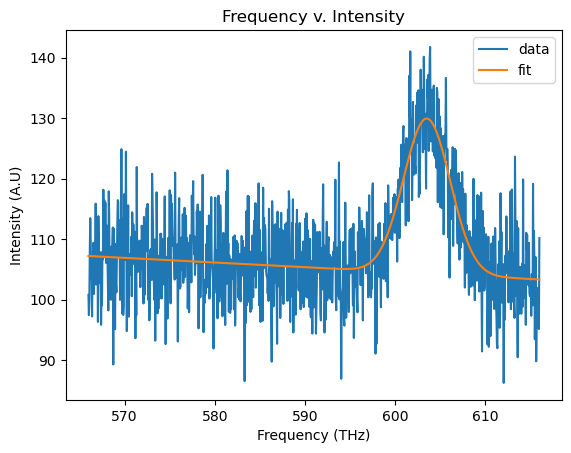

Observation_number 21339
Velocity 7913709.178209852
The errors are:  [1.32574815e-14 7.96785797e+00 7.80921619e-01 9.63635210e+10
 1.01756926e+11]


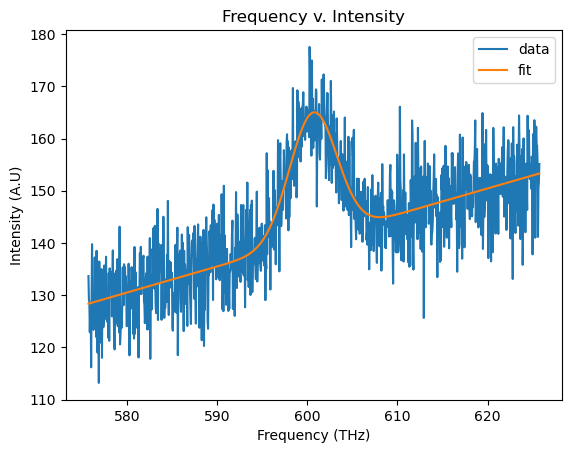

Observation_number 14269
Velocity 5786104.426416678
The errors are:  [2.76820134e-14 1.59491338e+01 9.30518087e-01 1.68476382e+11
 2.46419566e+11]


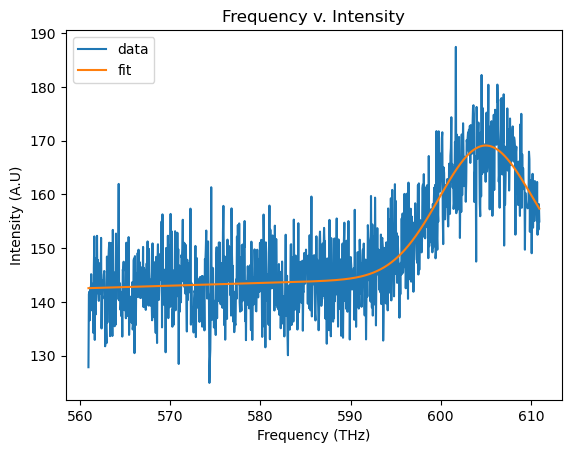

Observation_number 25604
Velocity 11463647.241609324
The errors are:  [1.62420944e-14 9.87422586e+00 6.80768814e-01 1.26828439e+11
 1.48265290e+11]


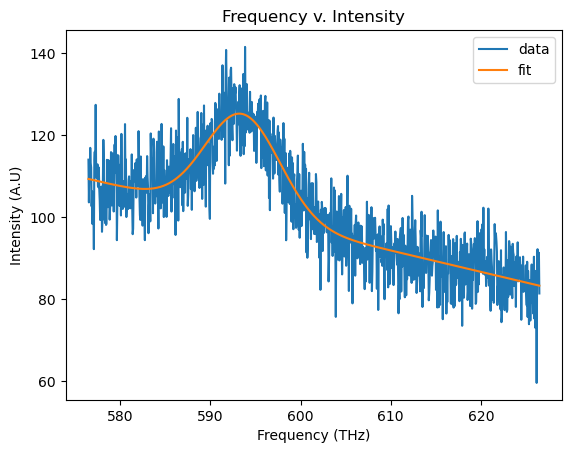

Observation_number 40457
Velocity 10227846.489525022
The errors are:  [1.40894416e-14 8.35763582e+00 5.97949815e-01 1.30153404e+11
 1.46587859e+11]


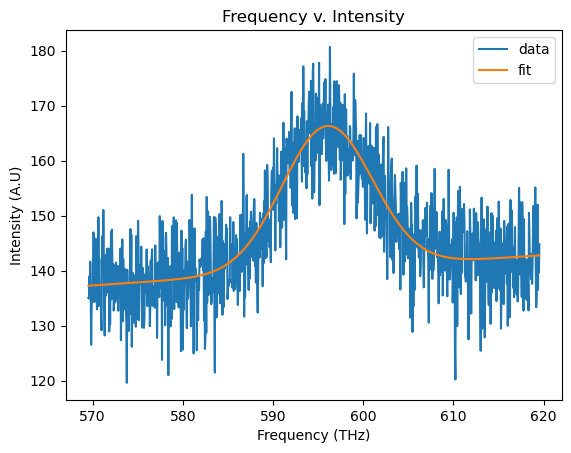

Observation_number 30308
Velocity 14987664.052195808
The errors are:  [1.36883827e-14 7.93694269e+00 6.71493899e-01 1.25050600e+11
 1.36950880e+11]


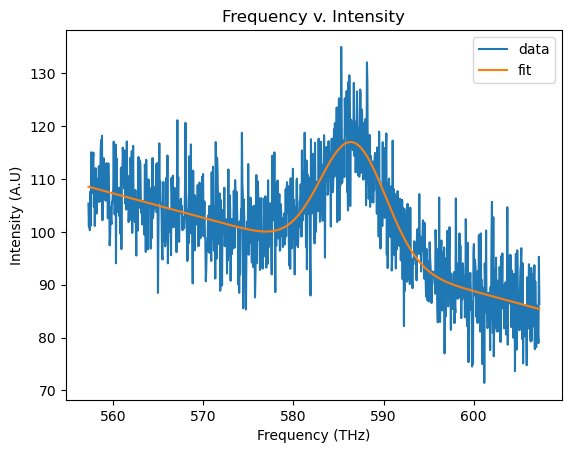

Observation_number 33315
Velocity 7074858.157498154
The errors are:  [1.36529012e-14 8.14106571e+00 6.27752245e-01 1.23860829e+11
 1.37274884e+11]


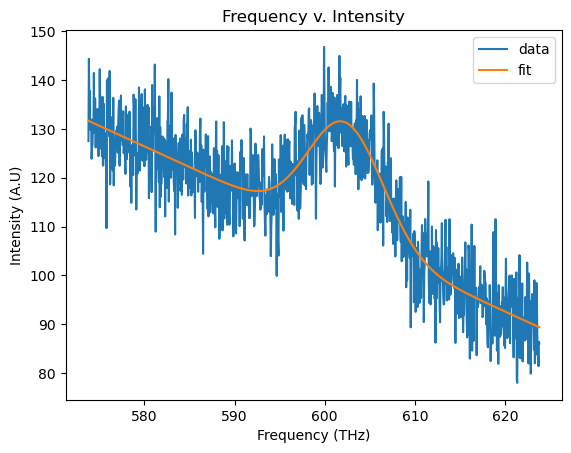

Observation_number 21212
Velocity 14132693.13610393
The errors are:  [1.72284252e-14 1.04167213e+01 5.72597789e-01 1.62366372e+11
 2.05900801e+11]


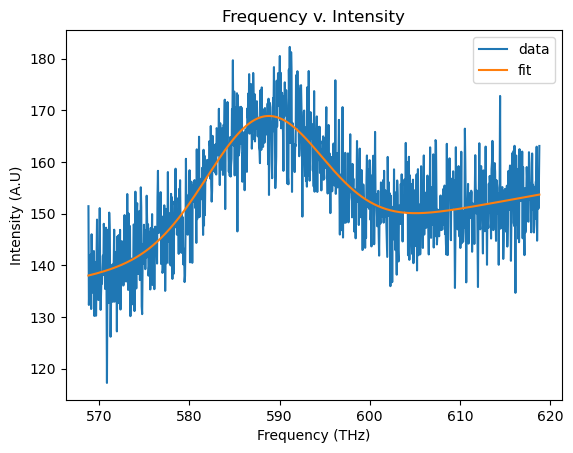

Observation_number 22260
Velocity 10695860.840189591
The errors are:  [1.67023061e-14 9.68442699e+00 6.08584453e-01 1.36983698e+11
 1.68103845e+11]


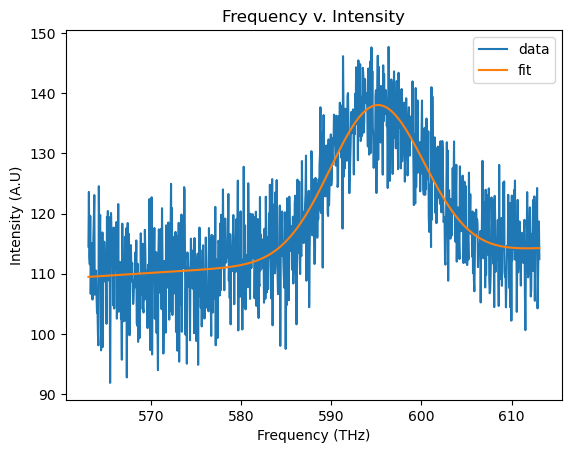

Observation_number 10509
Velocity 13127946.86069091
The errors are:  [1.38081838e-14 8.02509177e+00 9.29499873e-01 9.08376404e+10
 9.56000603e+10]


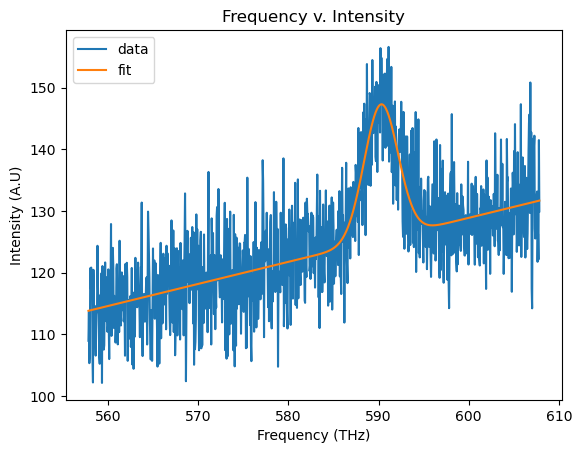

Observation_number 27079
Velocity 9137451.806518229
The errors are:  [2.68282287e-14 1.53980086e+01 7.56883675e-01 1.44415574e+11
 2.17231779e+11]


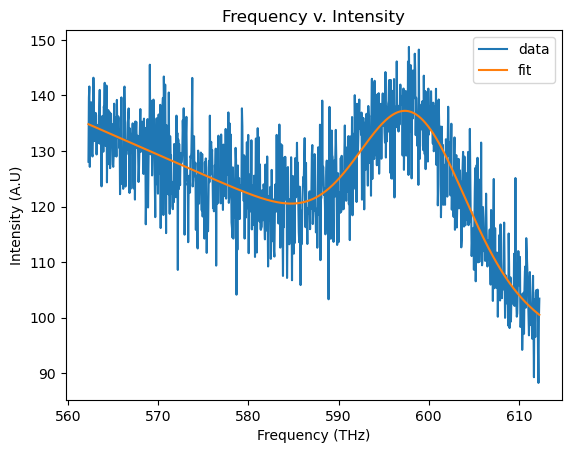

Observation_number 21251
Velocity 12579878.105215974
The errors are:  [1.28111625e-14 7.62632818e+00 7.06107870e-01 9.50260294e+10
 1.01448137e+11]


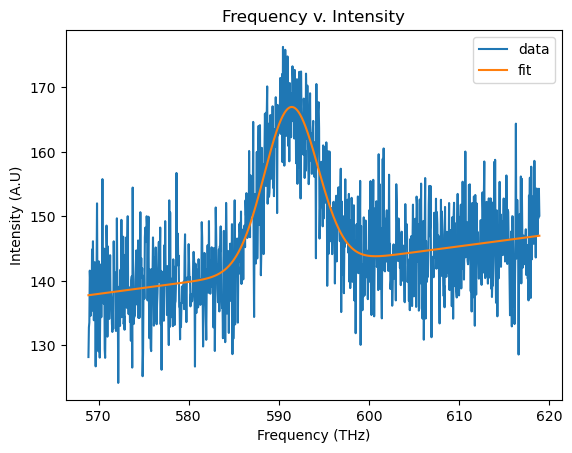

Observation_number 18045
Velocity 17415705.3751291
The errors are:  [1.34295362e-14 7.91817378e+00 9.48541988e-01 9.12510178e+10
 9.52417907e+10]


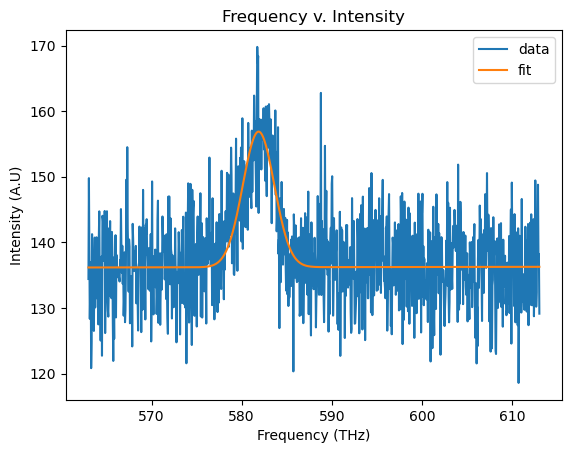

Observation_number 11982
Velocity 6104600.215681206
The errors are:  [1.92734041e-14 1.12903057e+01 6.18283483e-01 1.44000534e+11
 1.88114274e+11]


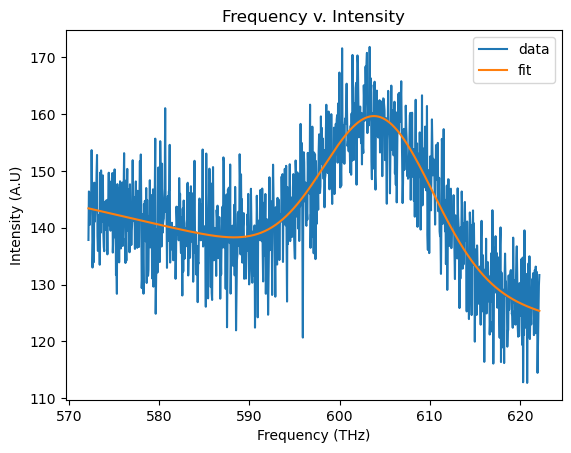

Observation_number 40969
Velocity 9854982.300461492
The errors are:  [5.44088014e-14 3.08729160e+01 1.55400359e+00 3.01863449e+11
 4.73525223e+11]


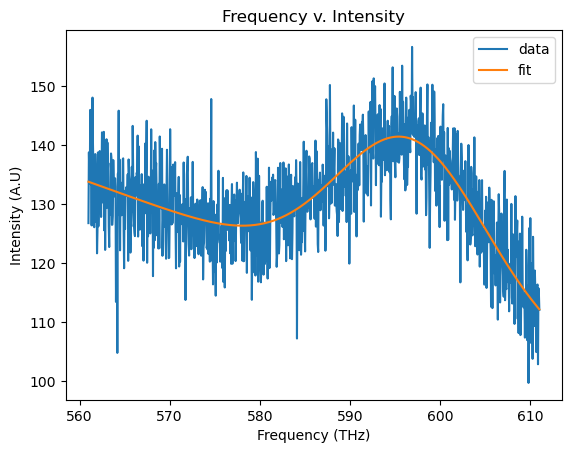

Observation_number 11239
Velocity 17745716.84685268
The errors are:  [1.43433639e-14 8.46589078e+00 6.95659100e-01 1.05547949e+11
 1.16384715e+11]


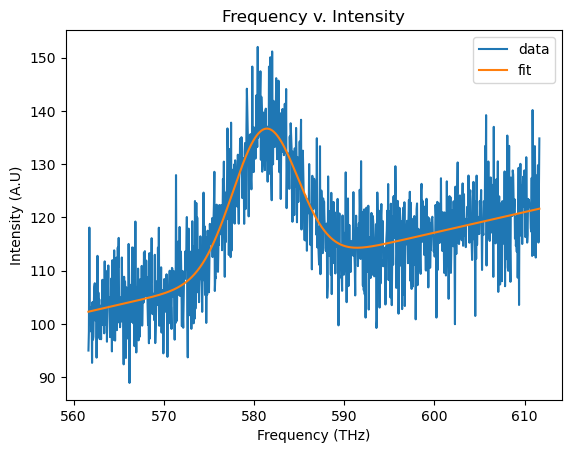

Observation_number 32462
Velocity 11557312.905852964
The errors are:  [1.42413028e-14 8.31985646e+00 6.06611036e-01 1.22515719e+11
 1.39522488e+11]


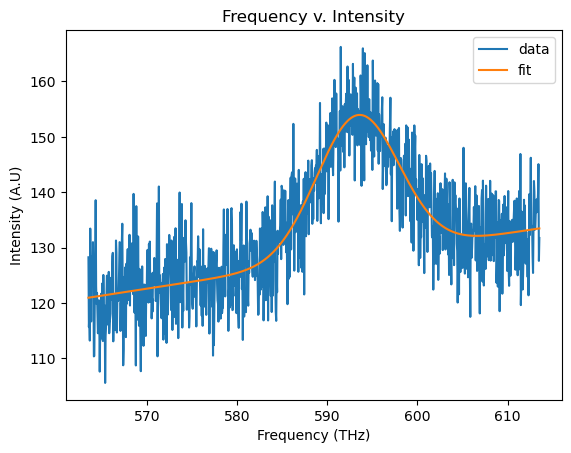

Observation_number 48672
Velocity 11674941.664004935
The errors are:  [1.68923289e-14 1.02712878e+01 6.48279806e-01 1.36359319e+11
 1.63867000e+11]


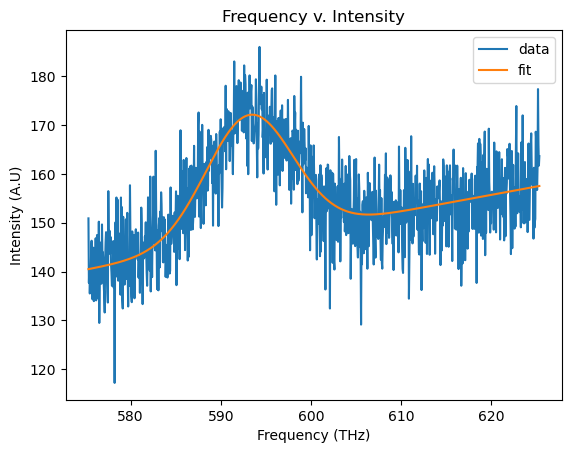

Observation_number 20507
Velocity 19426065.955208097
The errors are:  [1.30914074e-14 7.69422623e+00 7.06929259e-01 9.64593155e+10
 1.04578649e+11]


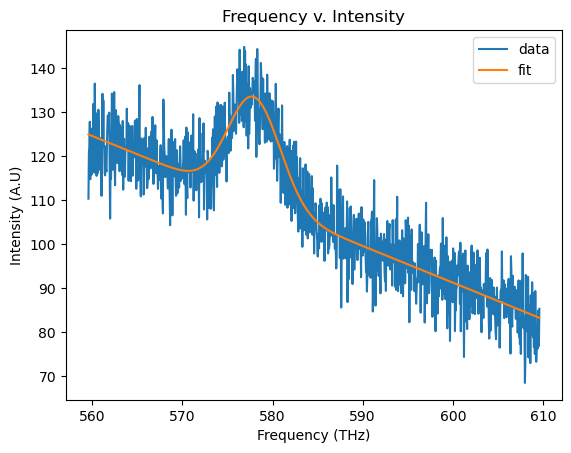

Observation_number 23933
Velocity 17253695.029866695
The errors are:  [1.54243822e-14 9.16606518e+00 5.85224984e-01 1.30822681e+11
 1.55495030e+11]


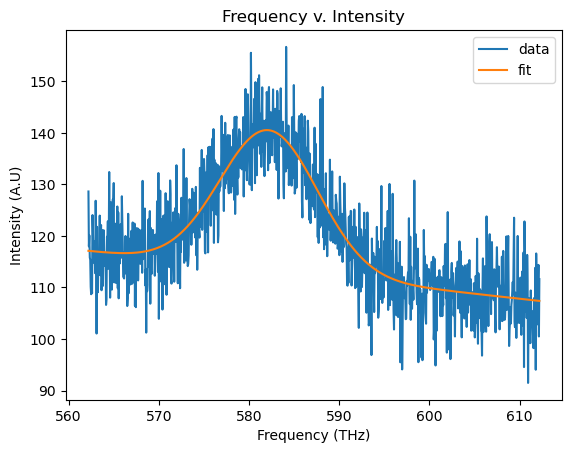

Observation_number 15162
Velocity 9753221.42556187
The errors are:  [2.24464048e-14 1.29140500e+01 6.76056215e-01 1.16459909e+11
 1.61740316e+11]


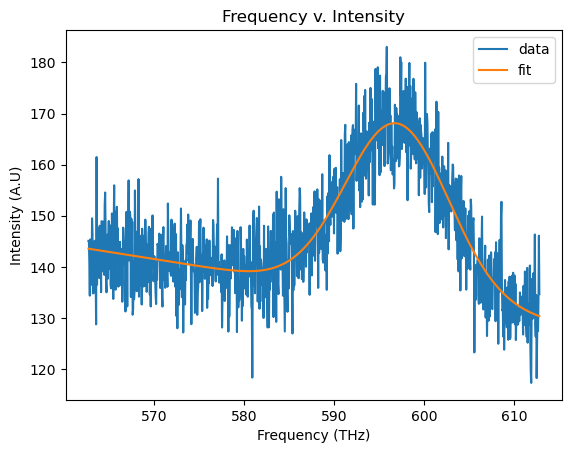

Observation_number 31386
Velocity 12500341.602146028
The errors are:  [1.38325588e-14 8.16257123e+00 6.89980669e-01 1.28631629e+11
 1.39367334e+11]


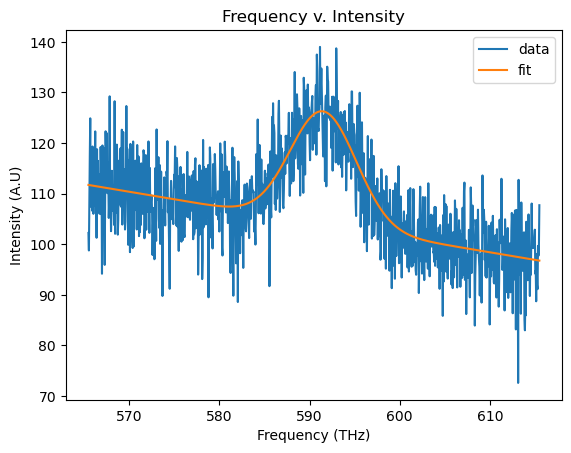

Observation_number 45769
Velocity 6213722.992681156
The errors are:  [1.36664835e-14 8.08770579e+00 1.26226417e+00 4.73319789e+10
 4.88718463e+10]


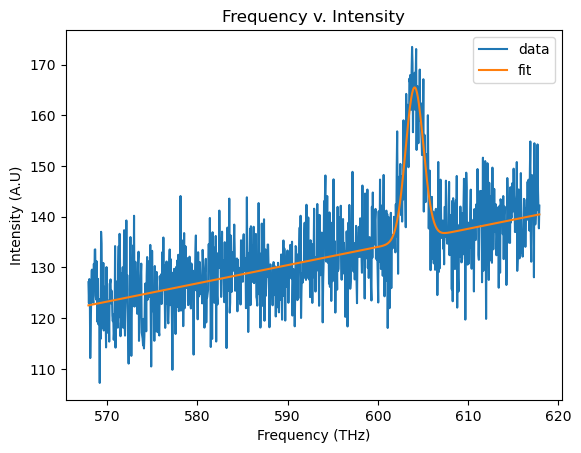

Observation_number 39352
Velocity 11354067.829745008
The errors are:  [1.41864742e-14 8.35185628e+00 5.93655371e-01 1.67419953e+11
 1.89836187e+11]


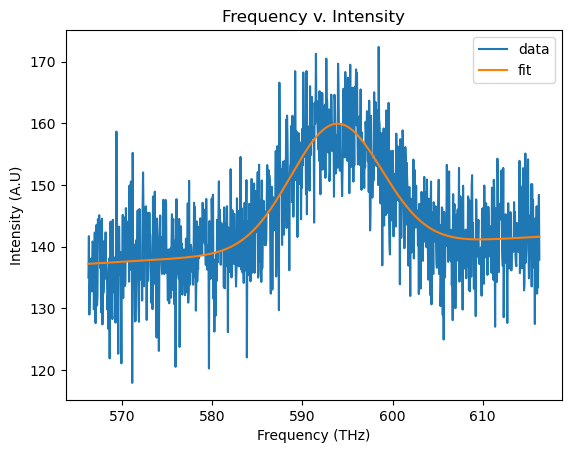

Observation_number 46882
Velocity 6769372.77749303
The errors are:  [1.39910705e-14 8.35845005e+00 6.26365161e-01 1.43983983e+11
 1.60422201e+11]


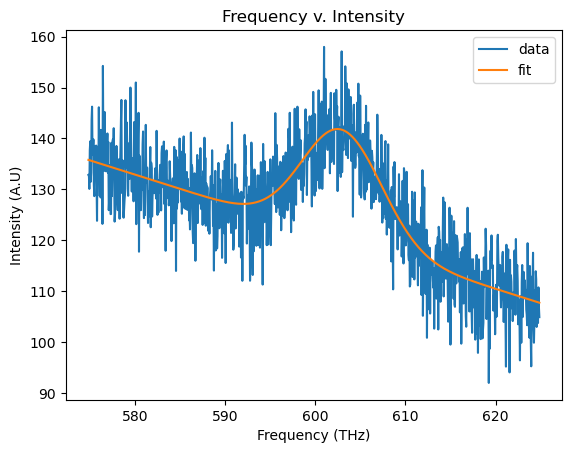

In [8]:
#Estimating guess parameters and fitting the curve for each plot 
no_columns = spectral_data_filtered.shape[1]

observed_frequency = []
velocities = []

observation_number = []

uncertainties = []

for i in range(0, int(no_columns), 2):
   j = i+1
   obs = spectral_data_filtered.iloc[:, i:j+1].copy()
   obs_no = obs.columns[0]
   observation_number.append(obs_no)
   obs.rename(columns={obs.columns[0]: 'Frequency', obs.columns[1]: 'Intensity'}, inplace=True)
   
   #To estimate slope use final and initial points
   guess_m = ((obs['Intensity'].tolist()[-1]) - (obs['Intensity'].tolist()[0]))/((obs['Frequency'].tolist()[-1]) - (obs['Frequency'].tolist()[0]))
   #To estimate y-intercept utilise estimate slope and any point
   guess_c = (obs['Intensity'].tolist()[0]) - (guess_m * obs['Frequency'].tolist()[0])
   #To estimate mean, use position of max value (input from Claude Code)
   max_intensity_index = obs['Intensity'].idxmax()
   guess_mu = obs.loc[max_intensity_index, 'Frequency']
   #To estimate A, subtract line fit value at mean from max value 
   line_estimate = np.polyval([guess_m, guess_c], guess_mu)
   guess_A = (obs['Intensity'].max() - line_estimate)
   #Estimate sigma ~ assuming standard for all curves
   fwhm = 1e13
   guess_sigma = fwhm/(2*np.sqrt(2*math.log(2)))

   my_guesses = [guess_m, guess_c, guess_A, guess_mu, guess_sigma]

   obs_frequency = obs['Frequency']
   obs_intensity = obs['Intensity']

   #Convert from Hz to THz
   obs_frequency_thz = obs['Frequency']/1e12

   obs_fit = curve_fit(model, obs_frequency, obs_intensity, p0=my_guesses)
   obs_data_fit = model(obs_frequency, *obs_fit[0])

   optimised_mean = obs_fit[0][3]
   #optimised_mean = observed frequency
   observed_frequency.append(optimised_mean)

   print('Observation_number', obs_no)
   print('Velocity', velocity(2.9979e8/optimised_mean))

   perr = np.sqrt(np.diag(obs_fit[1]))
   print('The errors are: ', perr)

   #Appending the uncertainty associated with the observed frequency used in following calculations 
   uncertainty = perr[3]
   uncertainties.append(uncertainty)

   plt.figure()
   plt.plot(obs_frequency_thz, obs_intensity, label='data')
   plt.plot(obs_frequency_thz, obs_data_fit, label='fit')
   plt.xlabel('Frequency (THz)')
   plt.ylabel('Intensity (A.U)')
   plt.title('Frequency v. Intensity')
   plt.legend()
   plt.show()


In [9]:
#Calculate the velocity and its associated error from the observed frequency
velocities = []
index = 0
for f in observed_frequency:
    f = ufloat(f, uncertainties[index])
    wavelength = 2.9979e8/f
    obs_velocity = velocity(wavelength)
    velocities.append(obs_velocity)
    index += 1

print(velocities)

#Extract only the nominal values 
velocities_nominal_values = []
for v in velocities:
    velocities_nominal_values.append(v.n)

print(velocities_nominal_values)

#Extract only the uncertainties 
velocities_uncertainties = []
for v in velocities:
    velocities_uncertainties.append(v.s)

print(velocities_uncertainties)

[6490628.894796859+/-45413.25111967918, 7913709.178209852+/-48048.00580414207, 5786104.426416678+/-83436.87188603527, 11463647.241609324+/-63943.446519498335, 10227846.489525022+/-65368.95792476409, 14987664.052195808+/-63727.992085964455, 7074858.157498154+/-61594.393263319114, 14132693.13610393+/-82531.42464970575, 10695860.840189591+/-68899.57358514154, 13127946.86069091+/-46032.31481997295, 9137451.806518229+/-72285.38953921992, 12579878.105215974+/-48074.20773174644, 17415705.3751291+/-46841.353754316064, 6104600.215681206+/-71388.20848022799, 9854982.300461492+/-151433.47301462572, 17745716.84685268+/-54233.182595579514, 11557312.905852964+/-61786.941458091984, 11674941.664004935+/-68793.46498096098, 19426065.955208097+/-49808.181286423394, 17253695.029866695+/-67122.2428002709, 9753221.42556187+/-58404.97468550402, 12500341.602146028+/-65059.62064037802, 6213722.992681156+/-23473.00748253356, 11354067.829745008+/-84380.03373420241, 6769372.77749303+/-71531.76321703581]
[6490628.

In [10]:
#Let's sort the distance dataframe to match the velocities
observation_number = [str(num) for num in observation_number]
#The following line is adapted from Claude Code
dist_df_cleaned_sorted = dist_df_cleaned.set_index('Observation_number').loc[observation_number].reset_index()
dist_df_cleaned_sorted['Distance'] = dist_df_cleaned_sorted['Distance'].astype(float)

Standard deviation,  4974.261884860732


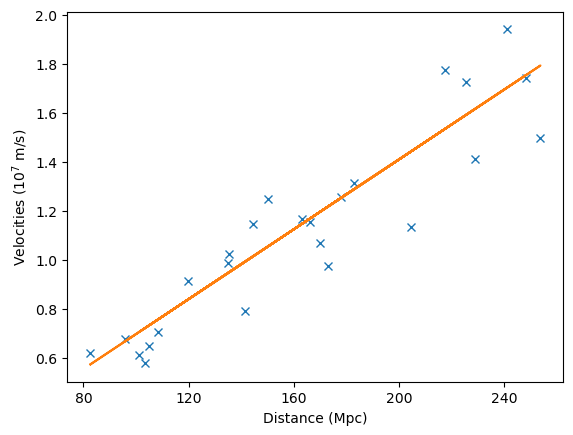

In [11]:
#Let us fit our line for the velocity against distance graph and plot it
polyfit, polycov = np.polyfit(dist_df_cleaned_sorted['Distance'], velocities_nominal_values, 1, cov=True, w=1/np.array(velocities_uncertainties))
polyfit_sigma = np.sqrt(polycov[0,0])
print('Standard deviation, ', polyfit_sigma)

polyval = np.polyval(polyfit, dist_df_cleaned_sorted['Distance'])

velocities_nominal_values_converted = [x/1e7 for x in velocities_nominal_values]

plt.plot(dist_df_cleaned_sorted['Distance'], velocities_nominal_values_converted, 'x')
plt.plot(dist_df_cleaned_sorted['Distance'], polyval/1e7)
plt.xticks(np.arange(80, 250, 40))
plt.ylabel(r'Velocities (10$^{7}$ m/s)')
plt.xlabel(r'Distance (Mpc)')
plt.show()

In [12]:
print(f'Estimate of Hubble constant {polyfit[0]} +/- {polyfit_sigma} ms-1 Mpc-1')

Estimate of Hubble constant 71232.71235285971 +/- 4974.261884860732 ms-1 Mpc-1


In [13]:
#Estimate of Hubble's constant: 71.23271235285971 +/- 4.974261884860732 km/s/Mpc